# What features make a song popular ?
# Ans : "ArtistName", "Loudness"


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import nltk

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
ss = pd.read_csv('C:/Users/Admin/Downloads/SpotifySongs.csv')
ss

SongName         ArtistName  \
0                                            Saiyaan Ji  Yo Yo Honey Singh   
1                                               Falling      Trevor Daniel   
2                                                Shayad             Pritam   
3     Malang (Title Track) [From "Malang - Unleash T...         Ved Sharma   
4                         Genda Phool (feat. Payal Dev)            Badshah   
...                                                 ...                ...   
3726                                      Back To Black      Amy Winehouse   
3727                           Where Do We Go From Here    Charles Bradley   
3728                          Way down We Go - Stripped              KALEO   
3729                                 Let's Talk It Over         Lee Fields   
3730                       The Gentle Rain - RJD2 Remix    Astrud Gilberto   

      Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0             62         0.896   0.678    0    -2.546     0       0.0815   
1             84         0.785   0.431   10    -8.756     0       0.0364   
2             72         0.483   0.468    8    -7.642     1       0.0341   
3             68         0.384   0.728    7    -6.503     0       0.0623   
4             67         0.955   0.538    1    -8.394     1       0.0734   
...          ...           ...     ...  ...       ...   ...          ...   
3726          79         0.766   0.706    7    -6.553     0       0.1600   
3727          69         0.735   0.784   11    -7.128     0       0.0332   
3728          60         0.701   0.463    6    -7.212     0       0.0416   
3729          54         0.595   0.628    1    -9.449     0       0.3170   
3730          56         0.544   0.152    4   -17.995     0       0.0280   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
0           0.0137          0.000041    0.1100    0.604  130.024       205450  
1           0.1230          0.000000    0.0887    0.236  127.085       159382  
2           0.7850          0.000000    0.1520    0.319  135.864       247941  
3           0.3290          0.000018    0.3290    0.311  156.396       287374  
4           0.1320          0.001460    0.0704    0.837  116.977       170769  
...            ...               ...       ...      ...      ...          ...  
3726        0.2230          0.000280    0.0640    0.766  142.989       172598  
3727        0.4490          0.154000    0.1050    0.582  120.012       191000  
3728        0.3570          0.003060    0.0730    0.352  139.941       313800  
3729        0.1830          0.315000    0.1220    0.170  102.029       230000  
3730        0.9100          0.256000    0.1100    0.075   90.863       226184  

[3731 rows x 15 columns]

# Steps

1. Data Cleaning
2. EDA

In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongName          3731 non-null   object 
 1   ArtistName        3731 non-null   object 
 2   Popularity        3731 non-null   int64  
 3   Danceability      3731 non-null   float64
 4   Energy            3731 non-null   float64
 5   Key               3731 non-null   int64  
 6   Loudness          3731 non-null   float64
 7   Mode              3731 non-null   int64  
 8   Speechiness       3731 non-null   float64
 9   Acousticness      3731 non-null   float64
 10  Instrumentalness  3731 non-null   float64
 11  Liveness          3731 non-null   float64
 12  Valence           3731 non-null   float64
 13  Tempo             3731 non-null   float64
 14  Duration_ms       3731 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 437.4+ KB


In [6]:
ss.duplicated().sum()

106

In [7]:
ss[ss.duplicated()]

SongName        ArtistName  Popularity  \
18                                     Swang      Rae Sremmurd           0   
20                              Another Love         Tom Odell          88   
74                                   Element         Pop Smoke          72   
130                               Experience  Ludovico Einaudi          63   
133                 Interstellar- Main Theme        Geek Music          63   
...                                      ...               ...         ...   
3651  How You Like Me Now? - Raffertie Remix         The Heavy          46   
3696                             Bloodstream         Stateless          60   
3697                                   Waves        Dean Lewis          54   
3712                             Bloodstream         Stateless          60   
3723  How You Like Me Now? - Raffertie Remix         The Heavy          60   

      Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
18           0.681  0.3140    8    -9.319     1       0.0583         0.200   
20           0.445  0.5370    4    -8.532     0       0.0400         0.695   
74           0.701  0.5540    1    -5.909     1       0.1870         0.217   
130          0.331  0.0451    9   -24.527     0       0.0337         0.908   
133          0.331  0.0451    9   -24.527     0       0.0337         0.908   
...            ...     ...  ...       ...   ...          ...           ...   
3651         0.523  0.4220    3   -10.385     0       0.0270         0.783   
3696         0.701  0.4630    6    -7.212     0       0.0416         0.357   
3697         0.595  0.6280    1    -9.449     0       0.3170         0.183   
3712         0.701  0.4630    6    -7.212     0       0.0416         0.357   
3723         0.701  0.4630    6    -7.212     0       0.0416         0.357   

      Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
18            0.000010    0.1000   0.1660  139.991       208120  
20            0.000017    0.0944   0.1310  122.769       244360  
74            0.000001    0.4190   0.0634   97.129       235187  
130           0.931000    0.0893   0.0381   95.954       243209  
133           0.931000    0.0893   0.0381   95.954       243209  
...                ...       ...      ...      ...          ...  
3651          0.005140    0.0898   0.1450  129.876       242060  
3696          0.003060    0.0730   0.3520  139.941       313800  
3697          0.315000    0.1220   0.1700  102.029       230000  
3712          0.003060    0.0730   0.3520  139.941       313800  
3723          0.003060    0.0730   0.3520  139.941       313800  

[106 rows x 15 columns]

In [8]:
ss[(ss['SongName']=='Swang')&(ss['ArtistName']=='Rae Sremmurd')]

SongName    ArtistName  Popularity  Danceability  Energy  Key  Loudness  \
16    Swang  Rae Sremmurd           0         0.681   0.314    8    -9.319   
18    Swang  Rae Sremmurd           0         0.681   0.314    8    -9.319   

    Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
16     1       0.0583           0.2           0.00001       0.1    0.166   
18     1       0.0583           0.2           0.00001       0.1    0.166   

      Tempo  Duration_ms  
16  139.991       208120  
18  139.991       208120

In [9]:
ss[(ss['SongName']=='Another Love')&(ss['ArtistName']=='Tom Odell')]

SongName ArtistName  Popularity  Danceability  Energy  Key  Loudness  \
19   Another Love  Tom Odell          88         0.445   0.537    4    -8.532   
20   Another Love  Tom Odell          88         0.445   0.537    4    -8.532   
269  Another Love  Tom Odell          81         0.504   0.788    3    -4.113   
676  Another Love  Tom Odell          86         0.532   0.783    2    -5.697   
678  Another Love  Tom Odell          76         0.783   0.435    7    -7.780   
679  Another Love  Tom Odell          79         0.766   0.706    7    -6.553   

     Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
19      0       0.0400        0.6950          0.000017    0.0944    0.131   
20      0       0.0400        0.6950          0.000017    0.0944    0.131   
269     0       0.2150        0.0134          0.000000    0.3630    0.228   
676     1       0.0523        0.0038          0.001200    0.1610    0.643   
678     1       0.0588        0.2820          0.000000    0.0833    0.512   
679     0       0.1600        0.2230          0.000280    0.0640    0.766   

       Tempo  Duration_ms  
19   122.769       244360  
20   122.769       244360  
269  170.039       186022  
676  124.080       247427  
678  106.974       210220  
679  142.989       172598

In [10]:
ss.drop_duplicates(inplace=True)

In [11]:
ss.shape

(3625, 15)

In [12]:
ss['SongName'].value_counts()

SongName
Baarishein                 44
Sygrayem (Let's Play)      37
Hope                       24
good 4 u                   24
Hollywood's Bleeding       24
                           ..
Emptiness                   1
If I Could                  1
Bright Eyes                 1
Game of Thrones - Theme     1
Never Really Over           1
Name: count, Length: 1063, dtype: int64

In [13]:
ss[ss['SongName']=='Baarishein']

SongName ArtistName  Popularity  Danceability  Energy  Key  Loudness  \
36    Baarishein  Anuv Jain          80         0.772   0.878    2    -4.220   
45    Baarishein  Anuv Jain          88         0.759   0.459    8    -5.187   
67    Baarishein  Anuv Jain          75         0.508   0.889    7    -2.755   
69    Baarishein  Anuv Jain           0         0.511   0.566    6    -7.230   
81    Baarishein  Anuv Jain          85         0.672   0.520    8    -7.747   
103   Baarishein  Anuv Jain          69         0.475   0.124    2    -9.463   
105   Baarishein  Anuv Jain           0         0.507   0.828   10    -6.023   
106   Baarishein  Anuv Jain          59         0.751   0.857    1    -4.385   
115   Baarishein  Anuv Jain          59         0.338   0.459    2    -8.827   
165   Baarishein  Anuv Jain          84         0.646   0.795    9    -3.293   
171   Baarishein  Anuv Jain          80         0.706   0.625    0    -7.426   
172   Baarishein  Anuv Jain          72         0.635   0.554    2    -3.975   
207   Baarishein  Anuv Jain          87         0.721   0.738    7    -4.770   
208   Baarishein  Anuv Jain          95         0.563   0.664    9    -5.044   
247   Baarishein  Anuv Jain          79         0.691   0.829    0    -7.179   
275   Baarishein  Anuv Jain          81         0.447   0.449    2   -10.634   
276   Baarishein  Anuv Jain          66         0.494   0.651   11    -4.127   
328   Baarishein  Anuv Jain          91         0.677   0.696    0    -6.181   
329   Baarishein  Anuv Jain          90         0.762   0.701    8    -3.541   
418   Baarishein  Anuv Jain          85         0.617   0.635   11    -6.769   
419   Baarishein  Anuv Jain          81         0.532   0.869   11    -5.094   
1323  Baarishein  Anuv Jain          79         0.647   0.823    2    -5.231   
1405  Baarishein  Anuv Jain          86         0.734   0.637    4    -5.677   
1406  Baarishein  Anuv Jain          78         0.730   0.861    1    -4.100   
1452  Baarishein  Anuv Jain          41         0.691   0.786    1    -6.110   
1453  Baarishein  Anuv Jain          67         0.786   0.732    7    -6.664   
1454  Baarishein  Anuv Jain          73         0.503   0.741    4    -5.128   
1455  Baarishein  Anuv Jain          85         0.595   0.784    1    -4.878   
1457  Baarishein  Anuv Jain          78         0.813   0.627   11    -5.018   
1521  Baarishein  Anuv Jain          89         0.776   0.780   10    -4.374   
1543  Baarishein  Anuv Jain          83         0.298   0.380    6    -8.426   
1545  Baarishein  Anuv Jain          82         0.474   0.631    5    -5.884   
1546  Baarishein  Anuv Jain          81         0.504   0.788    3    -4.113   
1547  Baarishein  Anuv Jain          75         0.684   0.671    2    -6.424   
1560  Baarishein  Anuv Jain          87         0.592   0.457    9    -6.081   
1561  Baarishein  Anuv Jain          83         0.662   0.714    5    -5.680   
1602  Baarishein  Anuv Jain          74         0.713   0.738   10    -6.784   
1605  Baarishein  Anuv Jain          78         0.526   0.862    2    -6.003   
1795  Baarishein  Anuv Jain          44         0.622   0.990   11    -5.500   
1880  Baarishein  Anuv Jain          51         0.744   0.337   11   -10.438   
2001  Baarishein  Anuv Jain          87         0.586   0.616    5    -7.964   
2236  Baarishein  Anuv Jain          51         0.512   0.526    1    -5.440   
2862  Baarishein  Anuv Jain          72         0.835   0.869   10    -4.582   
3475  Baarishein  Anuv Jain          42         0.635   0.433   11    -7.682   

      Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
36       1       0.3240       0.03010          0.000002    0.2510    0.305   
45       1       0.0948       0.00323          0.000000    0.0906    0.695   
67       0       0.0862       0.04950          0.000000    0.0984    0.332   
69       0       0.2000       0.34900          0.000000    0.3400    0.218   
81       1       

In [14]:
ss[ss['SongName']=='Emptiness']

SongName   ArtistName  Popularity  Danceability  Energy  Key  Loudness  \
1964  Emptiness  Zodiac Wave          87         0.721   0.738    7     -4.77   

      Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
1964     1       0.0403       0.00226          0.000004     0.118    0.637   

        Tempo  Duration_ms  
1964  119.976       154983

In [15]:
ss['ArtistName'].value_counts()

ArtistName
Carlos Rafael Rivera    199
Juice WRLD              146
The Chainsmokers        102
Eminem                   93
Bruno Mars               59
                       ... 
Jaden Thompson            1
Secondcity                1
London Music Works        1
Art Garfunkel             1
Samoht                    1
Name: count, Length: 561, dtype: int64

In [16]:
ss[(ss['ArtistName']=='Carlos Rafael Rivera')&(ss['SongName']=="Sygrayem (Let's Play)")]

SongName            ArtistName  Popularity  Danceability  \
58    Sygrayem (Let's Play)  Carlos Rafael Rivera          74        0.5720   
60    Sygrayem (Let's Play)  Carlos Rafael Rivera          95        0.5630   
89    Sygrayem (Let's Play)  Carlos Rafael Rivera          50        0.4720   
146   Sygrayem (Let's Play)  Carlos Rafael Rivera          40        0.5230   
150   Sygrayem (Let's Play)  Carlos Rafael Rivera          59        0.7510   
151   Sygrayem (Let's Play)  Carlos Rafael Rivera          79        0.7480   
152   Sygrayem (Let's Play)  Carlos Rafael Rivera           0        0.5070   
192   Sygrayem (Let's Play)  Carlos Rafael Rivera          64        0.4740   
228   Sygrayem (Let's Play)  Carlos Rafael Rivera          73        0.6600   
229   Sygrayem (Let's Play)  Carlos Rafael Rivera          76        0.7060   
230   Sygrayem (Let's Play)  Carlos Rafael Rivera          82        0.8330   
345   Sygrayem (Let's Play)  Carlos Rafael Rivera          67        0.7880   
346   Sygrayem (Let's Play)  Carlos Rafael Rivera          74        0.7230   
730   Sygrayem (Let's Play)  Carlos Rafael Rivera          89        0.7020   
756   Sygrayem (Let's Play)  Carlos Rafael Rivera          41        0.3330   
757   Sygrayem (Let's Play)  Carlos Rafael Rivera          40        0.4590   
758   Sygrayem (Let's Play)  Carlos Rafael Rivera          38        0.2290   
760   Sygrayem (Let's Play)  Carlos Rafael Rivera          37        0.1580   
761   Sygrayem (Let's Play)  Carlos Rafael Rivera          39        0.4920   
762   Sygrayem (Let's Play)  Carlos Rafael Rivera          37        0.3170   
763   Sygrayem (Let's Play)  Carlos Rafael Rivera          36        0.3530   
893   Sygrayem (Let's Play)  Carlos Rafael Rivera          78        0.7300   
894   Sygrayem (Let's Play)  Carlos Rafael Rivera          77        0.7270   
895   Sygrayem (Let's Play)  Carlos Rafael Rivera          85        0.5950   
896   Sygrayem (Let's Play)  Carlos Rafael Rivera          66        0.7020   
897   Sygrayem (Let's Play)  Carlos Rafael Rivera          76        0.4230   
898   Sygrayem (Let's Play)  Carlos Rafael Rivera          66        0.5840   
899   Sygrayem (Let's Play)  Carlos Rafael Rivera          87        0.5860   
900   Sygrayem (Let's Play)  Carlos Rafael Rivera          60        0.8490   
901   Sygrayem (Let's Play)  Carlos Rafael Rivera          72        0.8340   
1093  Sygrayem (Let's Play)  Carlos Rafael Rivera          89        0.7760   
1096  Sygrayem (Let's Play)  Carlos Rafael Rivera          52        0.0916   
1097  Sygrayem (Let's Play)  Carlos Rafael Rivera          41        0.4370   
1098  Sygrayem (Let's Play)  Carlos Rafael Rivera          41        0.3220   
1099  Sygrayem (Let's Play)  Carlos Rafael Rivera          42        0.2760   
1101  Sygrayem (Let's Play)  Carlos Rafael Rivera          84        0.6250   
1136  Sygrayem (Let's Play)  Carlos Rafael Rivera           0        0.8780   

      Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
58    0.7590    2    -4.312     1       0.0506       0.12700   
60    0.6640    9    -5.044     1       0.1540       0.33500   
89    0.6120    0   -10.982     1       0.0424       0.44800   
146   0.1080    0   -21.457     1       0.0411       0.94700   
150   0.8570    1    -4.385     0       0.0752       0.31000   
151   0.7340    0    -6.499     1       0.1240       0.52400   
152   0.8280   10    -6.023     1       0.0449       0.00711   
192   0.7920    5    -3.302     1       0.0510       0.06620   
228   0.1390    6   -16.339     0       0.0323       0.96400   
229   0.8240    0    -7.959     1       0.0694       0.35500   
230   0.4340    2    -8.795     1       0.4310       0.01020   
345   0.6050    1    -5.586     1       0.0578       0.00899   
346   0.8090    7    -3.081     0       0.0625       0.00346   
730   0.8250    6    -3.787     0       0.0601       0.00883   
756   0.0686    9   -28.798     0       0.0417       0.9

In [17]:
ss['Popularity'].value_counts()

Popularity
0     257
80    170
81    150
78    128
77    124
     ... 
2       2
34      2
14      1
94      1
25      1
Name: count, Length: 77, dtype: int64

In [18]:
max(ss['Popularity'])

97

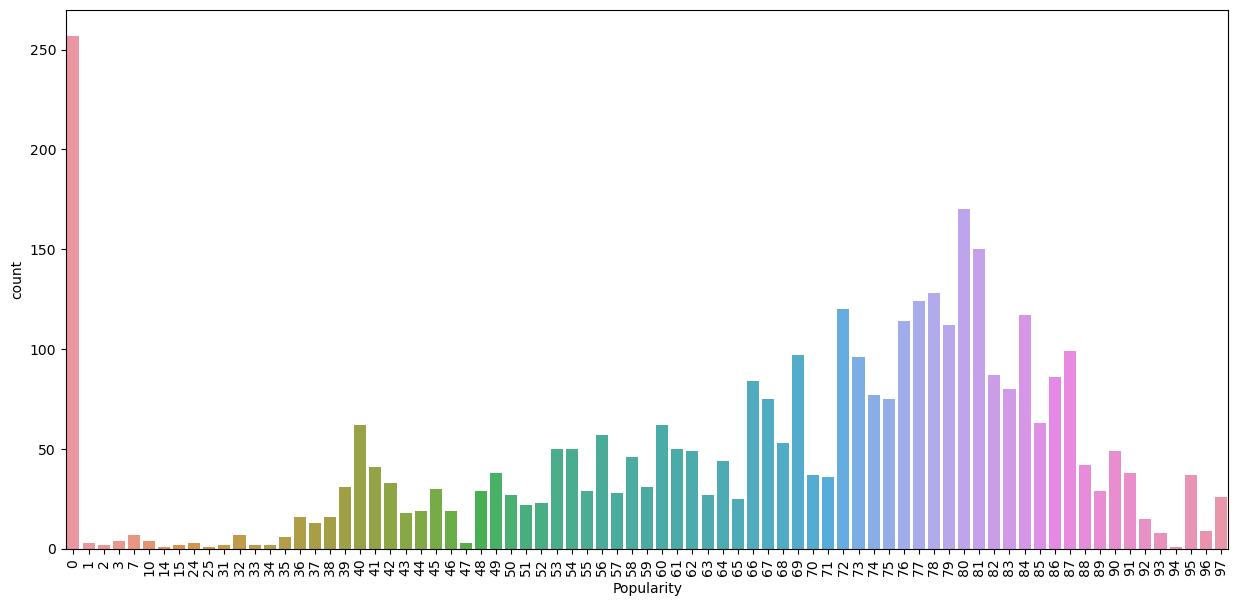

In [19]:
plt.figure(figsize=(15,7))
sn.countplot(data=ss,x='Popularity')
plt.xticks(rotation='vertical')
plt.show()

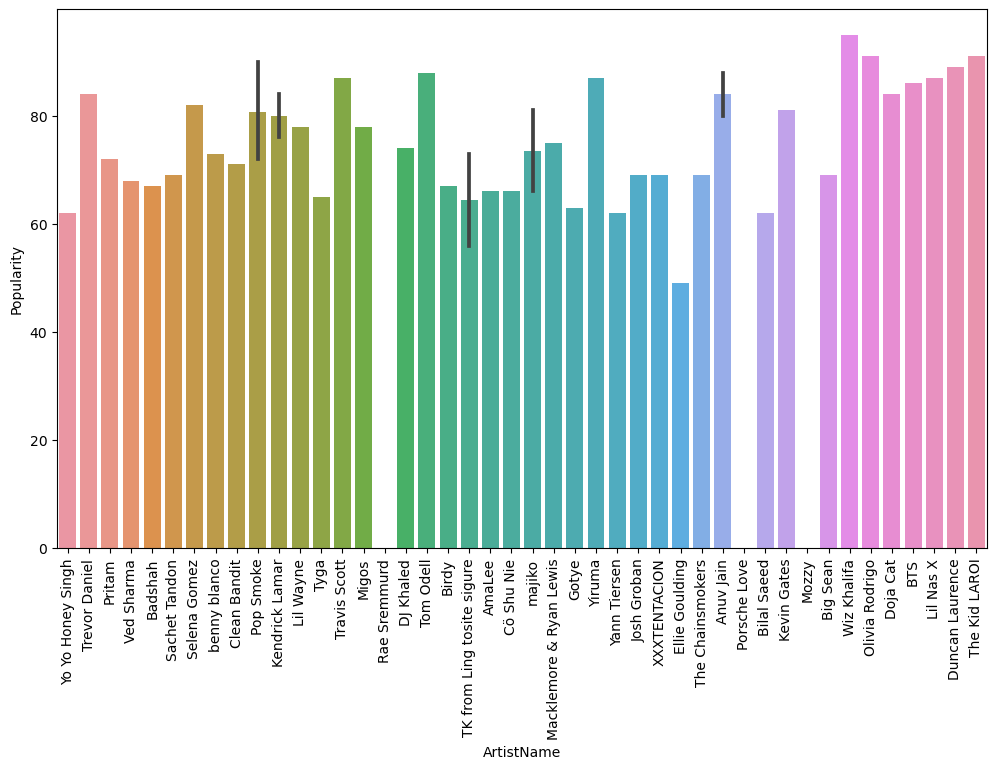

In [20]:
plt.figure(figsize=(12,7))
sn.barplot(data=ss[:50],x='ArtistName',y='Popularity')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
ss['Mode'].value_counts()

Mode
1    2127
0    1498
Name: count, dtype: int64

<Axes: >

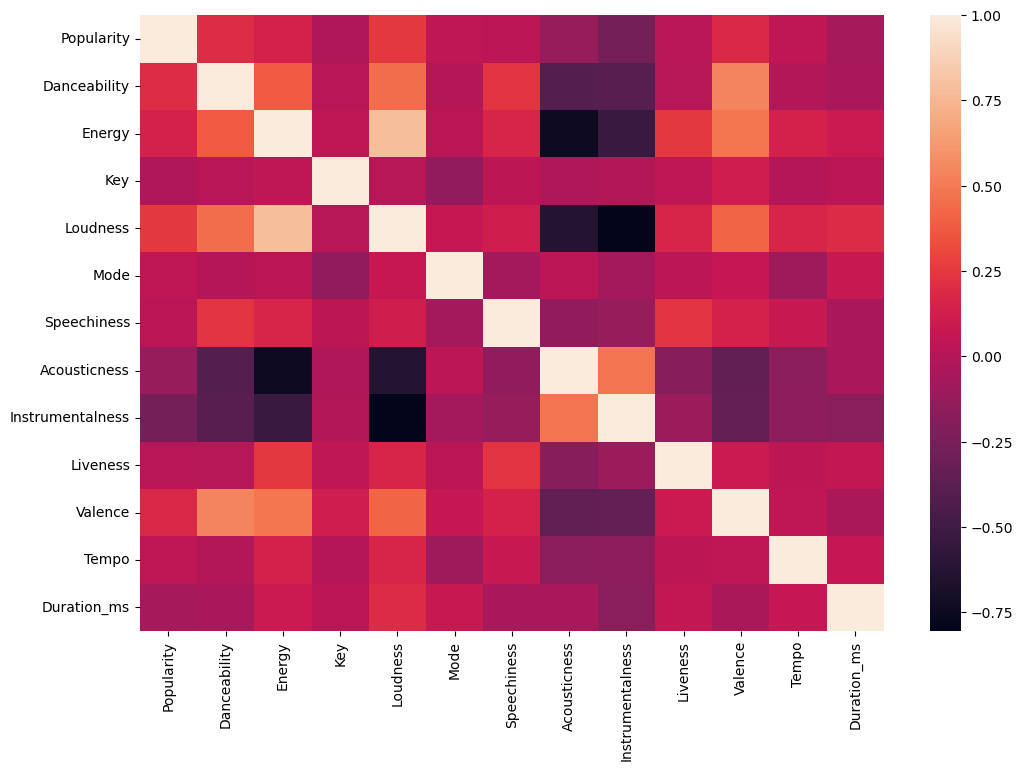

In [22]:
plt.figure(figsize=(12,8))
sn.heatmap(ss.select_dtypes(exclude='object').corr())

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


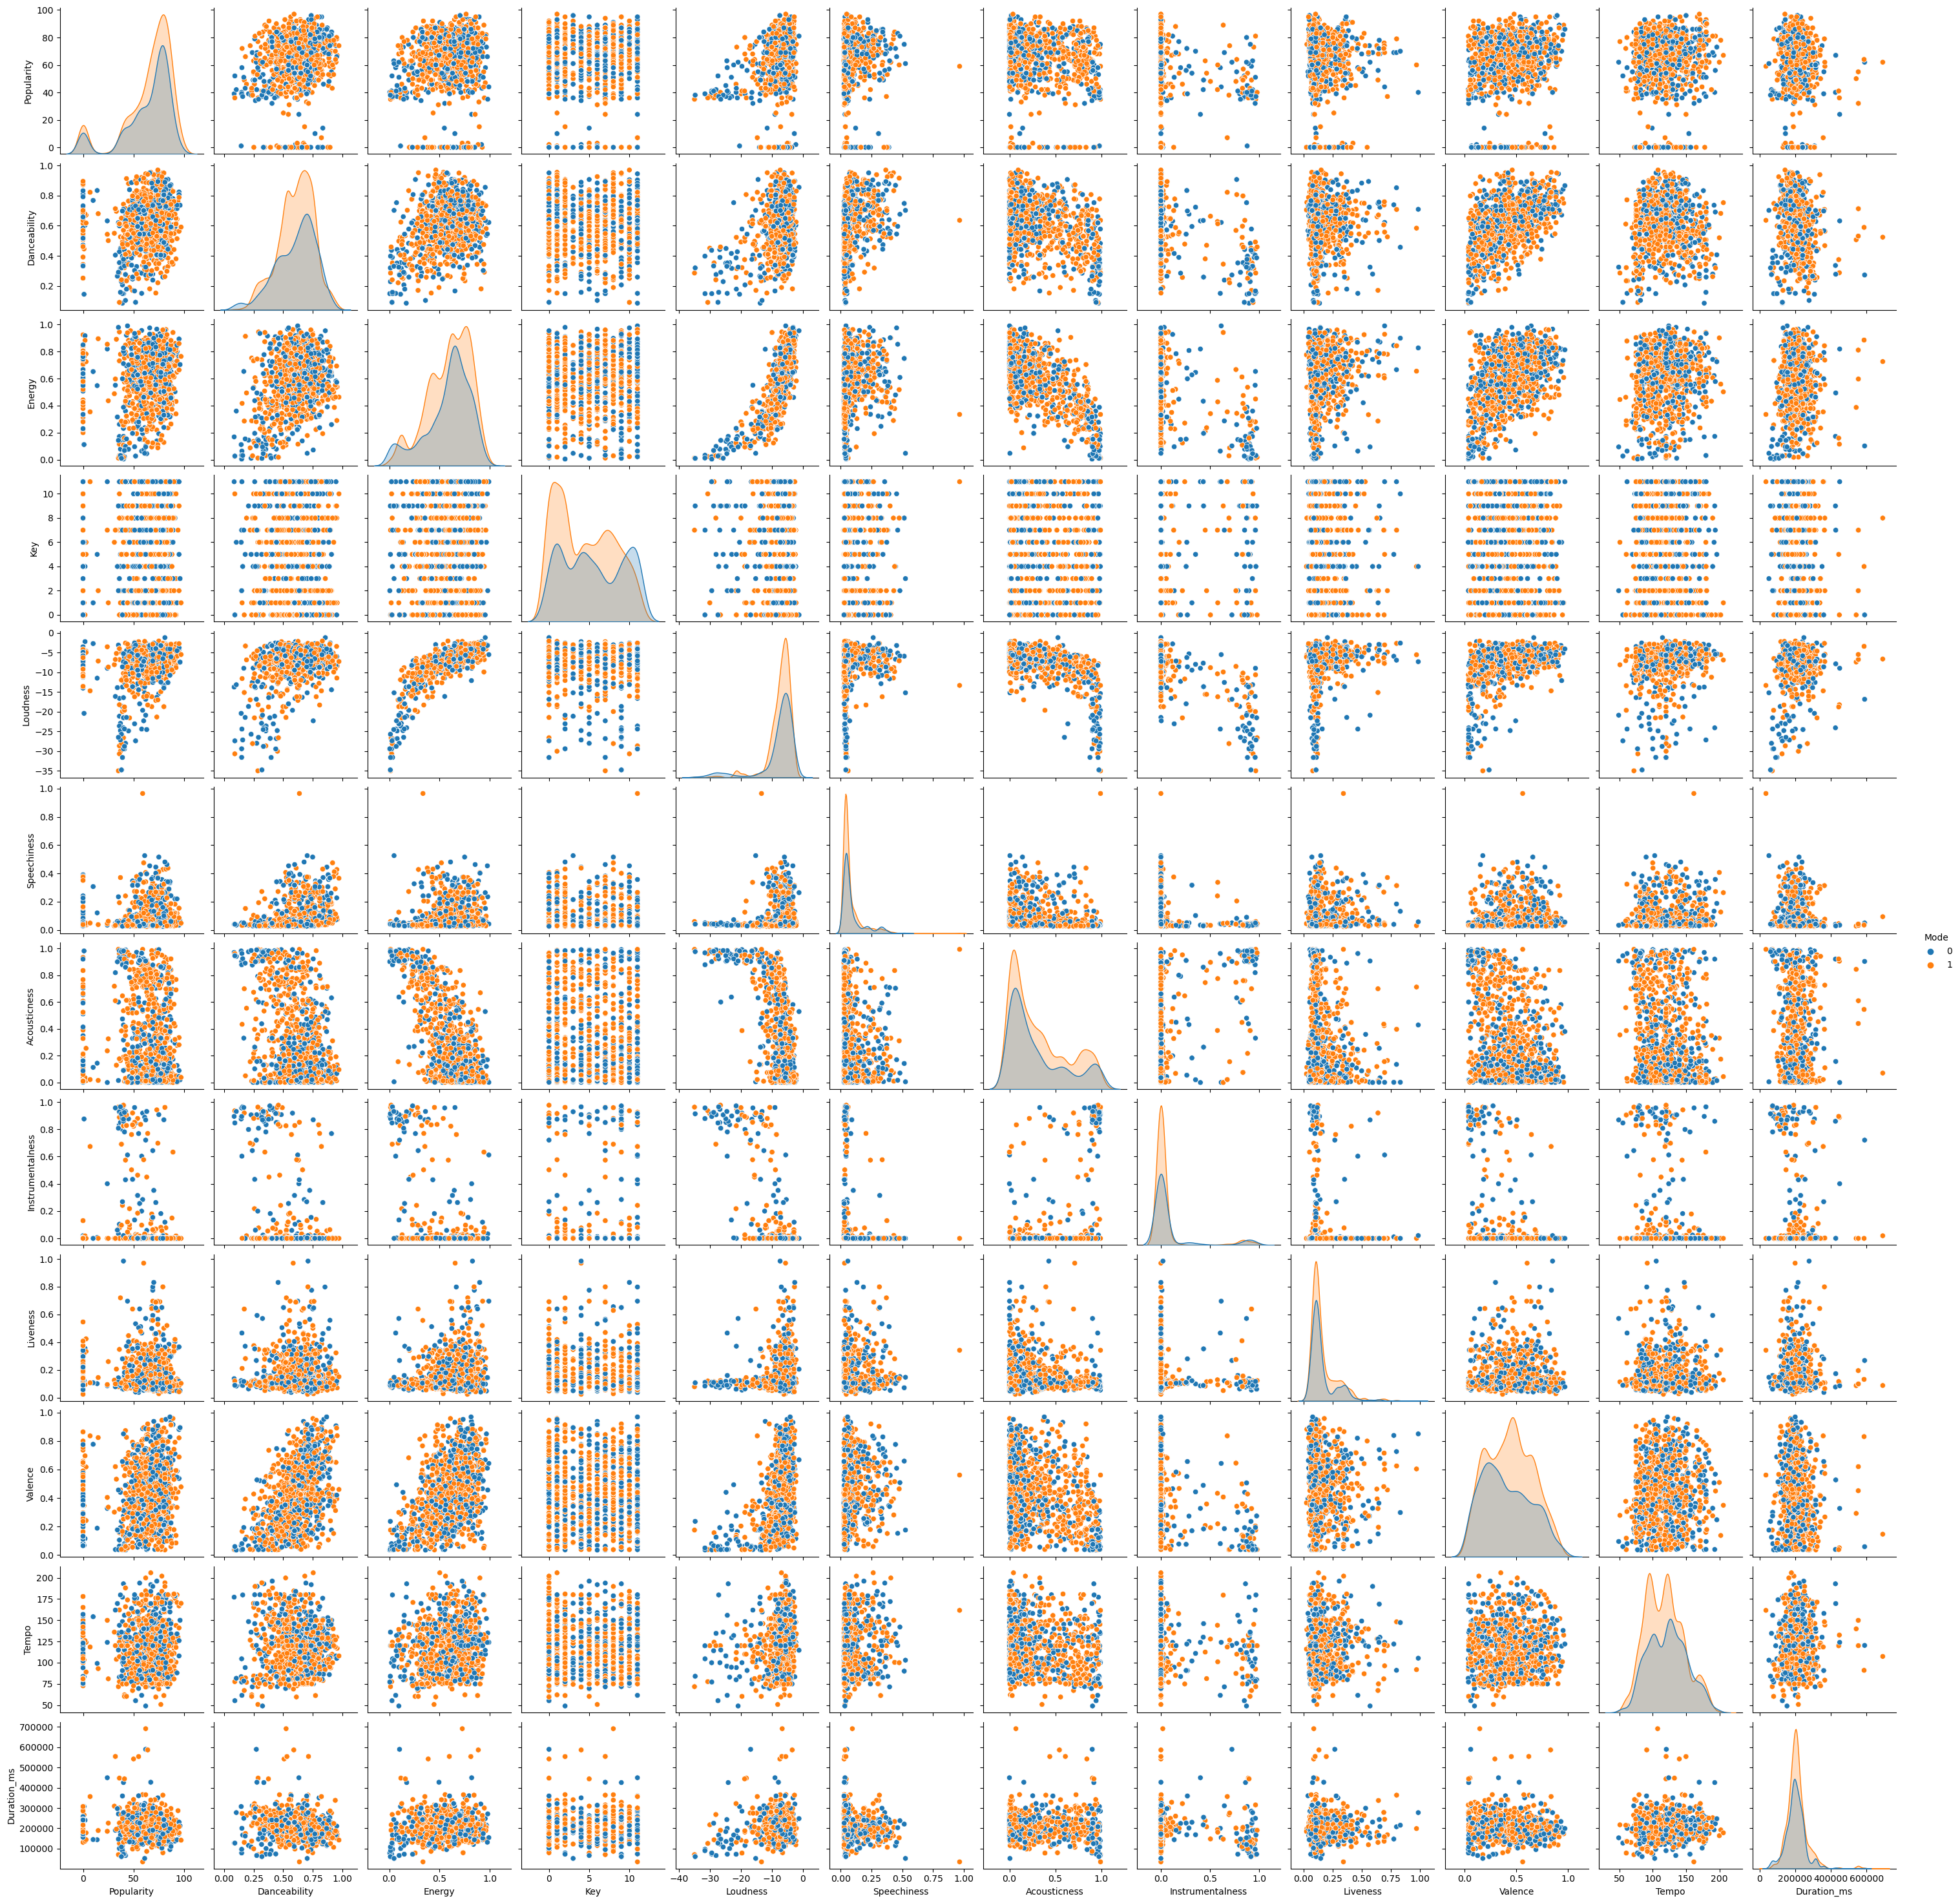

In [23]:
sn.pairplot(ss,hue='Mode')
plt.show()

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer



def clean_feature(text):
    tokens = word_tokenize(text.lower())
    
    word_tokens = [i for i in tokens if i.isalpha()]
    
    # Stopwords Removal
    clean_tokens = [i for i in word_tokens if i not in stopwords.words('english')]
    
    # lemmatization
    lemma = WordNetLemmatizer()
    lemmatized_token = (lemma.lemmatize(i) for i in clean_tokens)
    
    # PorterStemmer
    ps = PorterStemmer()
    stem_tokens = (ps.stem(i) for i in lemmatized_token)
    
    return " ".join(stem_tokens)

In [28]:
ss['Clean_Artist'] = ss['ArtistName'].apply(clean_feature)

In [29]:
ss['Clean_Artist']

0       yo yo honey singh
1           trevor daniel
2                  pritam
3              ved sharma
4                 badshah
              ...        
3726         ami winehous
3727        charl bradley
3728                kaleo
3729            lee field
3730      astrud gilberto
Name: Clean_Artist, Length: 3625, dtype: object

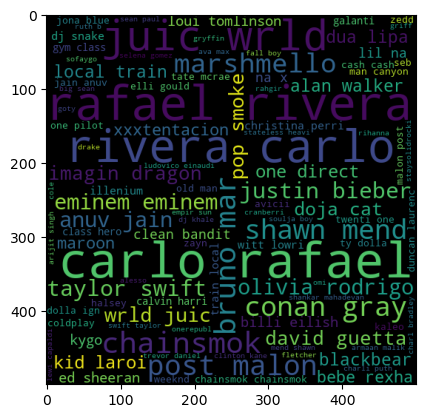

In [30]:
from wordcloud import WordCloud
wd = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

plt.imshow(wd.generate(ss['Clean_Artist'].str.cat(sep=' ')))

In [31]:
ss['Clean_Song'] = ss['SongName'].apply(clean_feature)

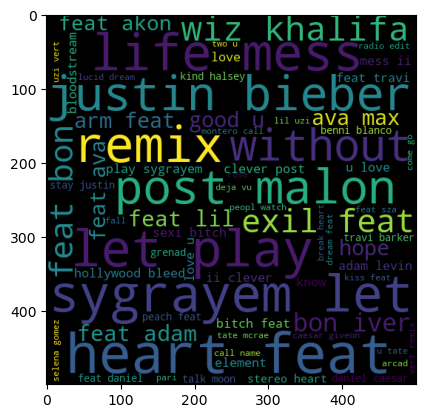

In [32]:
plt.imshow(wd.generate(ss['Clean_Song'].str.cat(sep=' ')))

In [33]:
ss

SongName         ArtistName  \
0                                            Saiyaan Ji  Yo Yo Honey Singh   
1                                               Falling      Trevor Daniel   
2                                                Shayad             Pritam   
3     Malang (Title Track) [From "Malang - Unleash T...         Ved Sharma   
4                         Genda Phool (feat. Payal Dev)            Badshah   
...                                                 ...                ...   
3726                                      Back To Black      Amy Winehouse   
3727                           Where Do We Go From Here    Charles Bradley   
3728                          Way down We Go - Stripped              KALEO   
3729                                 Let's Talk It Over         Lee Fields   
3730                       The Gentle Rain - RJD2 Remix    Astrud Gilberto   

      Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0             62         0.896   0.678    0    -2.546     0       0.0815   
1             84         0.785   0.431   10    -8.756     0       0.0364   
2             72         0.483   0.468    8    -7.642     1       0.0341   
3             68         0.384   0.728    7    -6.503     0       0.0623   
4             67         0.955   0.538    1    -8.394     1       0.0734   
...          ...           ...     ...  ...       ...   ...          ...   
3726          79         0.766   0.706    7    -6.553     0       0.1600   
3727          69         0.735   0.784   11    -7.128     0       0.0332   
3728          60         0.701   0.463    6    -7.212     0       0.0416   
3729          54         0.595   0.628    1    -9.449     0       0.3170   
3730          56         0.544   0.152    4   -17.995     0       0.0280   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  \
0           0.0137          0.000041    0.1100    0.604  130.024       205450   
1           0.1230          0.000000    0.0887    0.236  127.085       159382   
2           0.7850          0.000000    0.1520    0.319  135.864       247941   
3           0.3290          0.000018    0.3290    0.311  156.396       287374   
4           0.1320          0.001460    0.0704    0.837  116.977       170769   
...            ...               ...       ...      ...      ...          ...   
3726        0.2230          0.000280    0.0640    0.766  142.989       172598   
3727        0.4490          0.154000    0.1050    0.582  120.012       191000   
3728        0.3570          0.003060    0.0730    0.352  139.941       313800   
3729        0.1830          0.315000    0.1220    0.170  102.029       230000   
3730        0.9100          0.256000    0.1100    0.075   90.863       226184   

           Clean_Artist                            Clean_Song  
0     yo yo honey singh                            saiyaan ji  
1         trevor daniel                                  fall  
2                pritam                                shayad  
3            ved sharma  malang titl track malang unleash mad  
4               badshah            genda phool feat payal dev  
...                 ...                                   ...  
3726       ami winehous                            back black  
3727      charl bradley                                    go  
3728              kaleo                          way go strip  
3729          lee field                              let talk  
3730    astrud gilberto                      gentl rain remix  

[3625 rows x 17 columns]

In [34]:
ss_encoded = ss.iloc[:,:-2]
ss_encoded.sample(3)

SongName    ArtistName  Popularity  \
815                  Nothing's the Same  Alexander 23          80   
299   Hymn for the Weekend - Seeb Remix      Coldplay          77   
3152                          Hurricane    Kanye West          71   

      Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
815          0.772   0.878    2    -4.220     1       0.3240        0.0301   
299          0.818   0.913    4    -3.060     0       0.0426        0.0930   
3152         0.509   0.537    5    -6.834     1       0.0384        0.3470   

      Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
815           0.000002    0.2510    0.305   61.311       135747  
299           0.000037    0.1610    0.536  119.986       219160  
3152          0.000007    0.0805    0.311  170.030       240040

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ss_encoded['SongName'] = le.fit_transform(ss_encoded['SongName'])
ss_encoded['ArtistName'] = le.fit_transform(ss_encoded['ArtistName'])

ss_encoded.head()

SongName  ArtistName  Popularity  Danceability  Energy  Key  Loudness  \
0       711         533          62         0.896   0.678    0    -2.546   
1       251         503          84         0.785   0.431   10    -8.756   
2       737         394          72         0.483   0.468    8    -7.642   
3       529         515          68         0.384   0.728    7    -6.503   
4       286          61          67         0.955   0.538    1    -8.394   

   Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0     0       0.0815        0.0137          0.000041    0.1100    0.604   
1     0       0.0364        0.1230          0.000000    0.0887    0.236   
2     1       0.0341        0.7850          0.000000    0.1520    0.319   
3     0       0.0623        0.3290          0.000018    0.3290    0.311   
4     1       0.0734        0.1320          0.001460    0.0704    0.837   

     Tempo  Duration_ms  
0  130.024       205450  
1  127.085       159382  
2  135.864       247941  
3  156.396       287374  
4  116.977       170769

In [36]:
x = ss_encoded.iloc[:,1:]
x.head()

ArtistName  Popularity  Danceability  Energy  Key  Loudness  Mode  \
0         533          62         0.896   0.678    0    -2.546     0   
1         503          84         0.785   0.431   10    -8.756     0   
2         394          72         0.483   0.468    8    -7.642     1   
3         515          68         0.384   0.728    7    -6.503     0   
4          61          67         0.955   0.538    1    -8.394     1   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.0815        0.0137          0.000041    0.1100    0.604  130.024   
1       0.0364        0.1230          0.000000    0.0887    0.236  127.085   
2       0.0341        0.7850          0.000000    0.1520    0.319  135.864   
3       0.0623        0.3290          0.000018    0.3290    0.311  156.396   
4       0.0734        0.1320          0.001460    0.0704    0.837  116.977   

   Duration_ms  
0       205450  
1       159382  
2       247941  
3       287374  
4       170769

In [37]:
y = ss_encoded['SongName']
y.head()

0    711
1    251
2    737
3    529
4    286
Name: SongName, dtype: int32

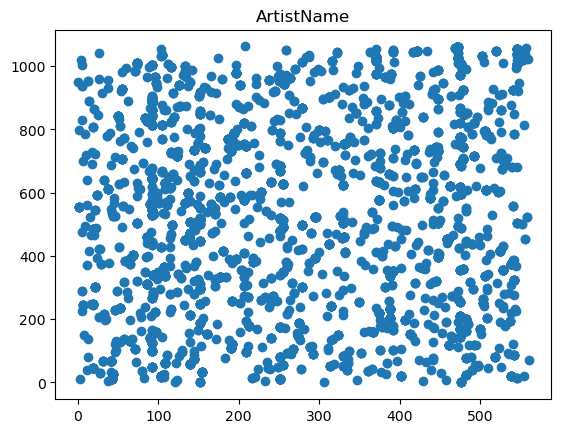

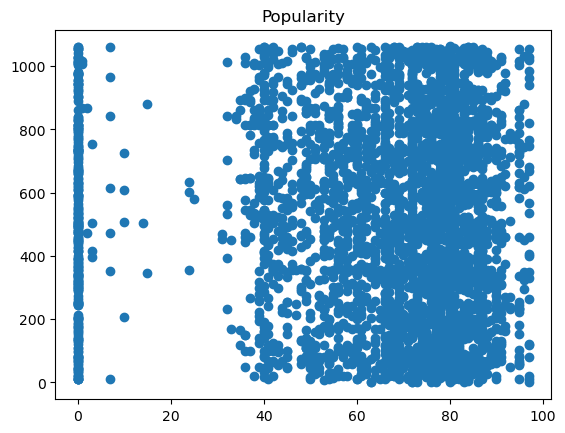

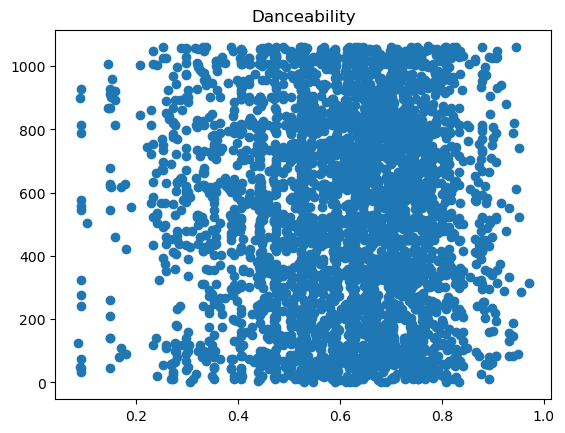

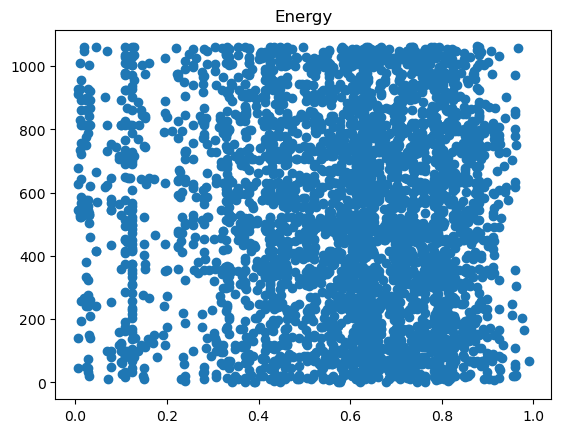

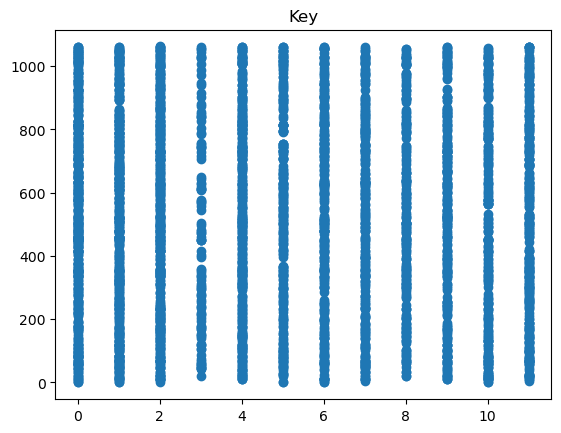

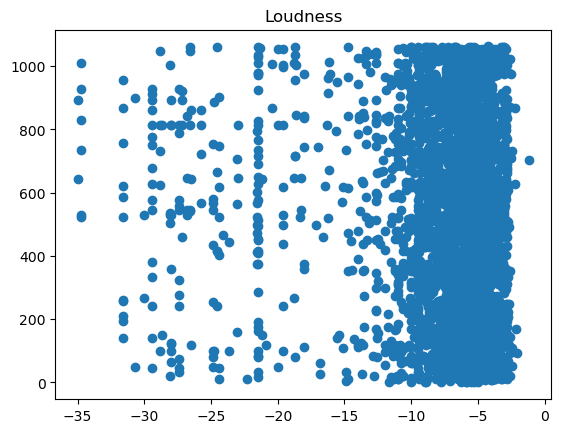

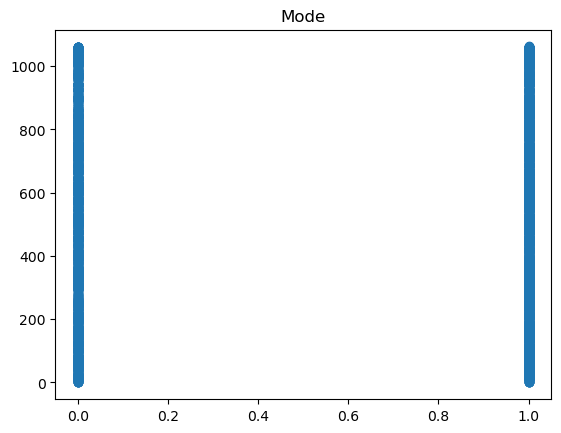

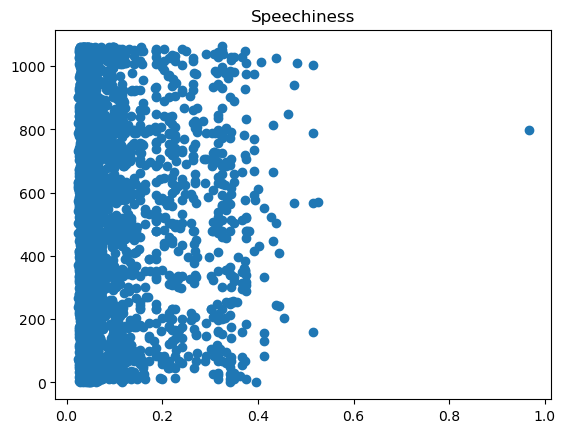

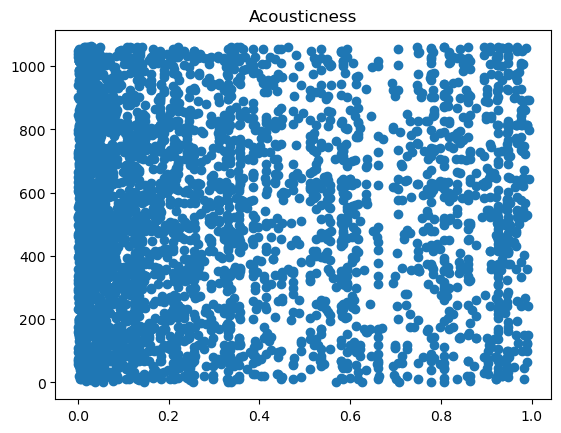

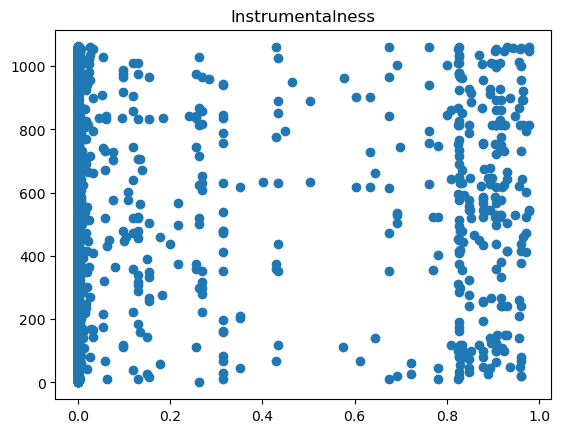

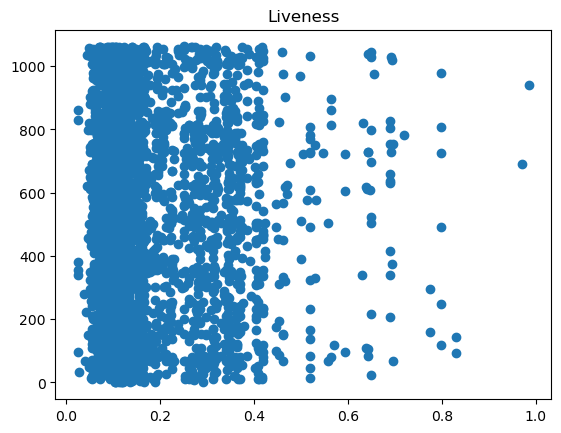

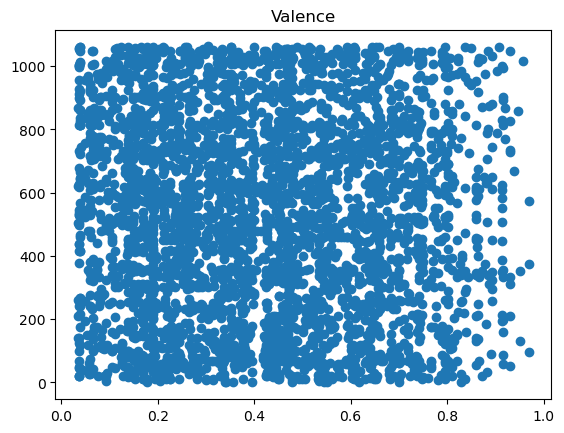

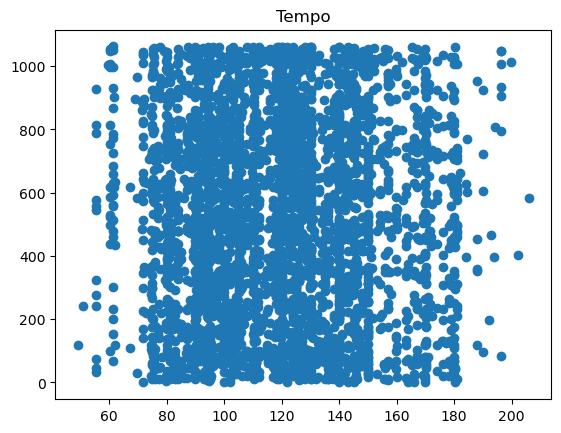

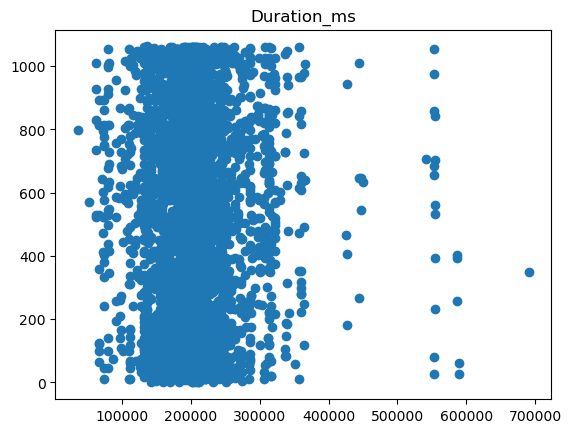

In [38]:
for col in x:
    plt.scatter(x[col],y)
    plt.title(f'{col}')
    plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

mm.fit_transform(x)

array([[0.95178571, 0.63917526, 0.91630853, ..., 0.60950037, 0.51631699,
        0.25966755],
       [0.89821429, 0.86597938, 0.79077132, ..., 0.21579116, 0.49758066,
        0.18938751],
       [0.70357143, 0.74226804, 0.44921963, ..., 0.30458971, 0.55354741,
        0.32449061],
       ...,
       [0.45714286, 0.6185567 , 0.69577019, ..., 0.33989515, 0.57953857,
        0.42496323],
       [0.51785714, 0.55670103, 0.57588781, ..., 0.14518027, 0.33784688,
        0.29712033],
       [0.08928571, 0.57731959, 0.51820855, ..., 0.04354338, 0.26666284,
        0.29129875]])

# ExtraTreesRegressor Feature Importance¶

[0.40618468 0.04774076 0.05167833 0.04631898 0.04606868 0.04873779
 0.02429897 0.04712513 0.04652371 0.03712352 0.04962997 0.0495758
 0.0514013  0.04759238]


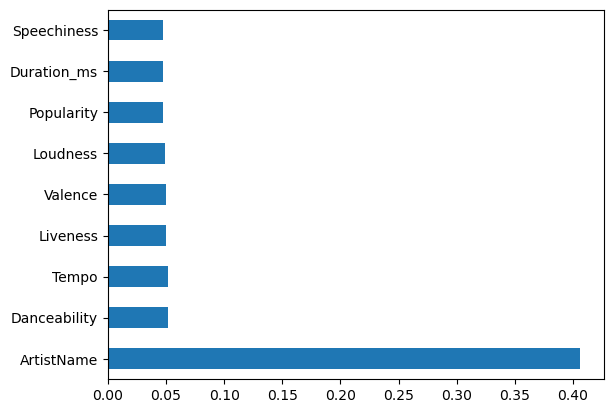

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

etr.fit(x,y)

print(etr.feature_importances_)

feat_imp = pd.Series(etr.feature_importances_,index=x.columns)
feat_imp.nlargest(9).plot(kind='barh')
plt.show()

# ExtraTreesRegressor (Artist) Feature Importance

In [42]:
x_artist = x.iloc[:,1:]
x_artist.head(2)

Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0          62         0.896   0.678    0    -2.546     0       0.0815   
1          84         0.785   0.431   10    -8.756     0       0.0364   

   Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
0        0.0137          0.000041    0.1100    0.604  130.024       205450  
1        0.1230          0.000000    0.0887    0.236  127.085       159382

In [43]:
y_artist = x['ArtistName']

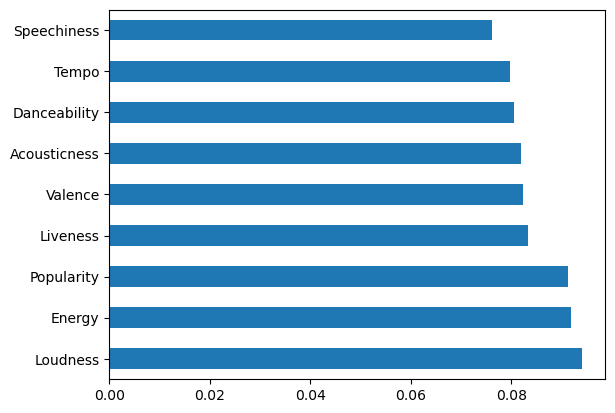

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

etr.fit(x_artist,y_artist)

etr.feature_importances_

feat_imp = pd.Series(etr.feature_importances_,index=x_artist.columns)
feat_imp.nlargest(9).plot(kind='barh')
plt.show()

# RandomForestRegressor Feature Importance

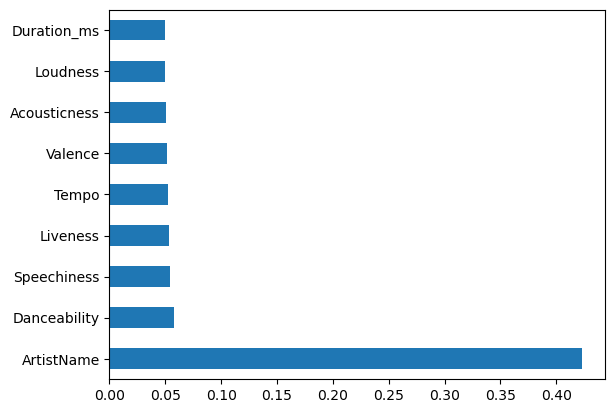

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfs = RandomForestRegressor()

rfs.fit(x,y)

feat_imp = pd.Series(rfs.feature_importances_,index=x.columns)
feat_imp.nlargest(9).plot(kind='barh')
plt.show()

# RandomForestRegressor (Artist) Feature Importance

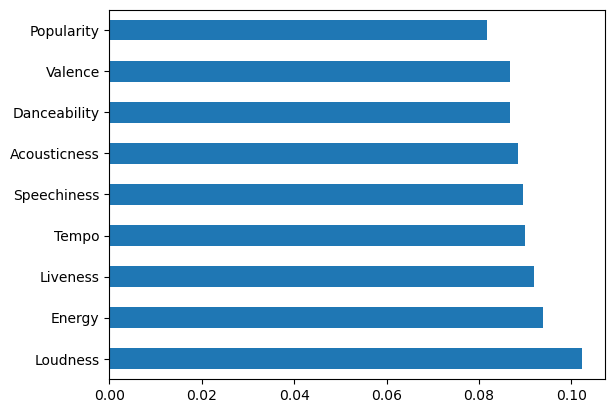

In [50]:
rfs.fit(x_artist,y_artist)

rfs.feature_importances_

feat_imp = pd.Series(rfs.feature_importances_,index=x_artist.columns)
feat_imp.nlargest(9).plot(kind='barh')
plt.show()

# RandomForestRegressor (Hyperparameters) Feature Importance

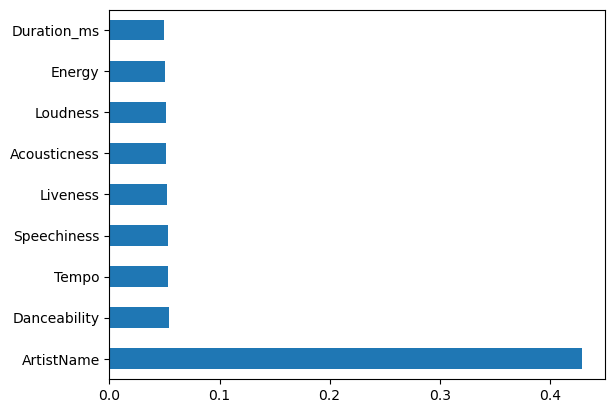

In [63]:
# Create the RandomForestRegressor with specified hyperparameters
model_rfs = RandomForestRegressor(
    n_estimators=100,
    max_features=9,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

# Train the model using your training data
model_rfs.fit(x,y)

feat_imp_rfshp = pd.Series(model_rfs.feature_importances_,index=x.columns)
feat_imp_rfshp.nlargest(9).plot(kind='barh')
plt.show()

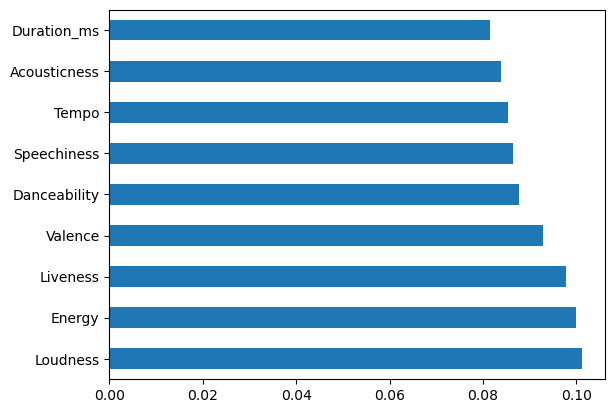

In [64]:
# Create the RandomForestRegressor with specified hyperparameters
model_rfs = RandomForestRegressor(
    n_estimators=100,
    max_features=9,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

# Train the model using your training data
model_rfs.fit(x_artist,y_artist)

feat_imp_rfshp = pd.Series(model_rfs.feature_importances_,index=x_artist.columns)
feat_imp_rfshp.nlargest(9).plot(kind='barh')
plt.show()